In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import Image, display

# import plotly
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')


%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_city_time_seris = pd.read_csv('City_time_series.csv')
# print top 10 item 
df_city_time_seris.head()

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131100.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df_cities_crosswalk = pd.read_csv('cities_crosswalk.csv')
df_cities_crosswalk.head()

,Unique_City_ID,City,County,State
0,oak_grovechristianky,Oak Grove,Christian,KY
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR
3,union_townshiperiepa,Union Township,Erie,PA
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI


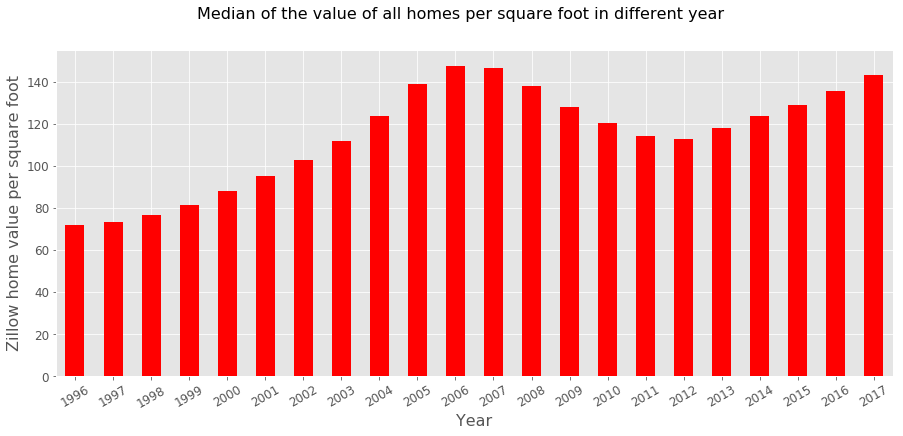

In [4]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind='bar',
                                                                                                figsize=(15, 6),
                                                                                                color='red')
plt.suptitle('Median of the value of all homes per square foot in different year', fontsize=16)
plt.ylabel('Zillow home value per square foot', fontsize=16)
plt.xlabel('Year', fontsize=16 )
plt.xticks(fontsize = 12, rotation=30)
plt.yticks(fontsize = 12)
plt.show()

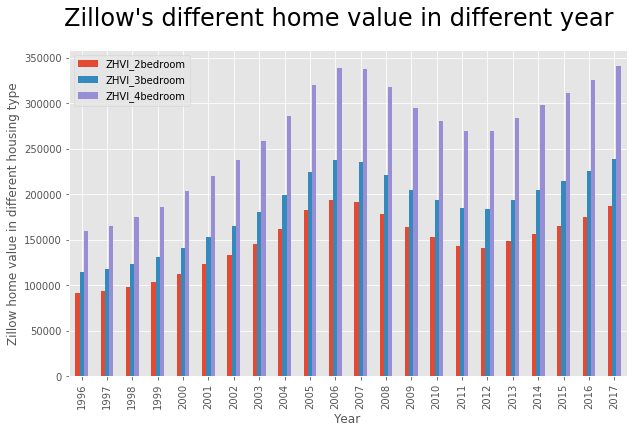

In [8]:
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)[['ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom']].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle("Zillow's different home value in different year", fontsize=24)
plt.ylabel('Zillow home value in different housing type')
plt.xlabel('Year')
plt.show()

In [5]:
bedroom3 = df_city_time_seris[df_city_time_seris['ZHVI_3bedroom'] <= 1000000]
bedroom2 = df_city_time_seris[df_city_time_seris['ZHVI_2bedroom'] <= 1000000]
bedroom4 = df_city_time_seris[df_city_time_seris['ZHVI_4bedroom'] <= 1000000]

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

trace1 = go.Histogram(
    x = bedroom2[bedroom2.Date.dt.year == 2017]['ZHVI_2bedroom'],
    opacity = 0.70,
    name='<b>2 Bedroom<b>'
)
trace2 = go.Histogram(
    x = bedroom3[bedroom3.Date.dt.year == 2017]['ZHVI_3bedroom'],
    opacity = 0.70,
    name='<b>3 Bedroom<b>'
)

trace3 = go.Histogram(
    x = bedroom4[bedroom4.Date.dt.year == 2017]['ZHVI_4bedroom'],
    opacity = 0.70,
    name='<b>4 Bedroom<b>'
)


data = [trace1, trace2, trace3]
layout = go.Layout(barmode = 'overlay',
                   title='<b>Distribution of House Value for 2, 3 and 4 Bedroom Houses<b>',
                    xaxis=dict(
                                title='<b>Value<b>'
                    ),
                    yaxis=dict(
                                title='<b>Count<b>'))
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

In [6]:
new_df = df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)[['ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom']].mean()
new_df.reset_index(inplace = True)
new_df = new_df[new_df.Date >= 2000]

In [13]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x = new_df.Date,
    y = new_df.ZHVI_2bedroom,
    name='<b>2 Bedrooms</b>'
)
trace2 = go.Bar(
    x = new_df.Date,
    y = new_df.ZHVI_3bedroom,
    name='<b>3 Bedrooms</b>'
)
trace3 = go.Bar(
    x = new_df.Date,
    y = new_df.ZHVI_4bedroom,
    name='<b>4 Bedrooms</b>'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title='<b>Average House Value Over the Years</b>',
    xaxis=dict(tickangle=-45, 
              tickmode='linear',
              title='<b>Year</b>'),
    yaxis=dict(title='<b>Zillow House Value (in Dollars)</b>')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [15]:
bedroom1 = df_city_time_seris[df_city_time_seris.Date.dt.year == 2017]['MedianListingPricePerSqft_1Bedroom']
bedroom2 = df_city_time_seris[df_city_time_seris.Date.dt.year == 2017]['MedianListingPricePerSqft_2Bedroom']
bedroom3 = df_city_time_seris[df_city_time_seris.Date.dt.year == 2017]['MedianListingPricePerSqft_3Bedroom']
bedroom4 = df_city_time_seris[df_city_time_seris.Date.dt.year == 2017]['MedianListingPricePerSqft_4Bedroom']
bedroom5OrMore = df_city_time_seris[df_city_time_seris.Date.dt.year == 2017]['MedianListingPricePerSqft_5BedroomOrMore']

In [16]:
x_data = ['1 Bedroom', '2 Bedrooms',
          '3 Bedrooms', '4 Bedrooms',
          '5 or more Bedrooms']

y0 = bedroom1
y1 = bedroom2
y2 = bedroom3
y3 = bedroom4
y4 = bedroom5OrMore


colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)']


trace0 = go.Box(
    y=y0,
    name = '<b>1 Bedroom</b>',
    marker = dict(
        color = 'rgba(93, 164, 214, 0.5)',
    )
)
trace1 = go.Box(
    y=y1,
    name = '<b>2 Bedrooms</b>',
    marker = dict(
        color = 'rgba(255, 144, 14, 0.5)',
    )
)
trace2 = go.Box(
    y=y2,
    name = '<b>3 Bedrooms</b>',
    marker = dict(
        color = 'rgba(44, 160, 101, 0.5)',
    )
)
trace3 = go.Box(
    y=y3,
    name = '<b>4 Bedrooms</b>',
    marker = dict(
        color = 'rgba(255, 65, 54, 0.5)',
    )
)
trace4 = go.Box(
    y=y4,
    name = '<b>5 or more Bedrooms</b>',
    marker = dict(
        color = 'rgba(207, 114, 255, 0.5)',
    )
)


data = [trace0, trace1, trace2, trace3, trace4]


layout = go.Layout(
    title='<b>Listing Price Per SquareFeet of Apartments in 2017</b>',
    xaxis=dict(
              tickmode='linear',
              title='<b>Number of Bedrooms</b>'),
    yaxis=dict(title='<b>Listing Price Per Square Feet (in Dollars)<b>')
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [23]:
df_state_time_seris = pd.read_csv('State_time_series.csv')
# print top 10 item 
df_state_time_seris.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_county_time_seris = pd.read_csv('County_time_series.csv')
# print top 10 item 
df_county_time_seris.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65600.0,NaN,85700.0,86000.0,129700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81900.0,NaN,116800.0,116900.0,181400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70600.0,NaN,110600.0,106800.0,192300.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70000.0,70000.0,123500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
trace0 = go.Scatter(
    x = df_state_time_seris['DaysOnZillow_AllHomes'],
    y = df_state_time_seris['PctOfHomesSellingForGain_AllHomes'],
    mode = 'markers'
)

data = [trace0]

layout = go.Layout(
    title='<b>Percent of Homes Selling for Gain by Days the Ad has been on Zillow',
    xaxis=dict(
              title='<b>Number of Days the Ad has been on Zillow'),
    yaxis=dict(title='<b>Percentage of Homes Selling for Gain')
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter-mode')

In [33]:
trace0 = go.Scatter(
    x = df_state_time_seris['DaysOnZillow_AllHomes'],
    y = df_state_time_seris['PctOfHomesSellingForLoss_AllHomes'],
    mode = 'markers'
)

data = [trace0]

layout = go.Layout(
    title='Percent of Homes Selling for Loss by Days the Ad has been on Zillow',
    xaxis=dict(
              title='Number of Days the Ad has been on Zillow'),
    yaxis=dict(title='Percentage of Homes Selling for Loss')
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter-mode')

In [26]:
trace0 = go.Scatter(
    x = df_state_time_seris['DaysOnZillow_AllHomes'],
    y = df_state_time_seris['PctOfHomesDecreasingInValues_AllHomes'],
    mode = 'markers'
)

data = [trace0]

layout = go.Layout(
    title='<b>Percent of Homes Decreasing In Values by Days the Ad has been on Zillow',
    xaxis=dict(
              title='<b>Number of Days the Ad has been on Zillow'),
    yaxis=dict(title='<b>Percent of Homes Decreasing In Values')
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter-mode')

In [28]:
df_regi_zhvi_sq_mean = df_city_time_seris.groupby(df_city_time_seris.RegionName)['ZHVIPerSqft_AllHomes'].mean().reset_index(name = "ZHVIpersqft_mean")
# drop null values
df_regi_zhvi_sq_mean = df_regi_zhvi_sq_mean.dropna(subset=['ZHVIpersqft_mean'], how='any')
df_regi_zhvi_sq_mean.index = df_regi_zhvi_sq_mean.RegionName

In [29]:
df_cities_crosswalk = pd.read_csv('cities_crosswalk.csv')
df_cities_crosswalk.index = df_cities_crosswalk.Unique_City_ID

In [30]:
df_regi_zhvi_sq_mean = df_regi_zhvi_sq_mean.join(df_cities_crosswalk)

In [48]:
state_mean = pd.DataFrame(df_state_time_seris.groupby('RegionName')['ZHVIPerSqft_AllHomes'].mean()).reset_index()



In [73]:
# define our data for plotting
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_mean['State'], # location (states)
        z = state_mean['ZHVIpersqft_mean'], # Zillow Home value per square foot
        locationmode = 'USA-states', # let's define the location mode to USA_states
        text = 'Median home value per square foot',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Home value per square foot")
        ) ]

layout = dict(
        title = 'Median of the value of all homes per square foot in different states<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' )
             ))

fig = dict( data=data, layout=layout )
# let's plot
py.iplot( fig, filename='d3-cloropleth-map' )

In [84]:
sorted_state_mean = state_mean.sort_values(by = 'ZHVIpersqft_mean', ascending=False)

In [23]:
chloropleth = df_state_time_seris[['RegionName',
       'MedianRentalPricePerSqft_2Bedroom',
       'MedianRentalPricePerSqft_3Bedroom',
       'MedianRentalPricePerSqft_4Bedroom']]

In [24]:
chloropleth= chloropleth.groupby('RegionName')[['MedianRentalPricePerSqft_2Bedroom',
       'MedianRentalPricePerSqft_3Bedroom',
       'MedianRentalPricePerSqft_4Bedroom']].mean()

In [25]:
chloropleth['MedianRentalPricePerSqft_AllHomes'] = df_state_time_seris.groupby('RegionName')['MedianRentalPricePerSqft_AllHomes'].mean()

In [21]:
chloropleth.to_csv('chloro.csv')

In [27]:
chloropleth.reset_index(inplace = True)

In [28]:
chloropleth.columns = ['State', '2 Bedroom', '3 Bedroom', '4 Bedroom', 'All Homes']

In [29]:
chloropleth = pd.melt(chloropleth, id_vars=['State'], value_vars=['2 Bedroom', '3 Bedroom', '4 Bedroom'])

In [48]:
chloropleth['All Homes'] = pd.concat([df_state_time_seris.groupby('RegionName')['MedianRentalPricePerSqft_AllHomes'].mean()]*2,  ignore_index=True)

In [50]:
chloropleth.drop('MedianRentalPricePerSqft_AllHomes', inplace = True, axis = 1)

In [51]:
chloropleth.to_csv('chloro.csv')

In [96]:
PriceRatio = df_city_time_seris[['PriceToRentRatio_AllHomes', 'MedianRentalPrice_AllHomes', 'RegionName']]

In [58]:
crosswalk = pd.read_csv('cities_crosswalk.csv')

In [61]:
crosswalk.index = crosswalk.Unique_City_ID

In [97]:
PriceRatio.index = PriceRatio.RegionName

In [98]:
PriceRation = PriceRatio.join(crosswalk)

In [99]:
PriceRation.drop(['RegionName', 'Unique_City_ID', 'City'], inplace = True, axis = 1)

In [104]:
PriceRation.to_csv('priceratio.csv')

In [69]:
PriceRation.columns

Index(['PriceToRentRatio_AllHomes', 'County', 'State'], dtype='object')

In [100]:
PriceRation = PriceRation.groupby('County')[['PriceToRentRatio_AllHomes', 'MedianRentalPrice_AllHomes']].mean()

In [93]:
PriceRation.dropna(inplace = True)

In [102]:
PriceRation.fillna(-1, inplace = True)

In [28]:
df_state_time_seris.Date = pd.to_datetime(df_state_time_seris.Date)
year = df_state_time_seris[['Date', 'ZHVI_TopTier', 'ZHVI_BottomTier', 'ZHVI_MiddleTier']]
year.Date = year.Date.dt.year


In [29]:
year = year.groupby('Date')[['ZHVI_TopTier', 'ZHVI_BottomTier', 'ZHVI_MiddleTier']].mean()


In [31]:
year.reset_index(inplace = True)

In [34]:
trace1 = go.Scatter(
    x=year.Date,
    y=year.ZHVI_BottomTier,
    fill='tozeroy',
    name = '<b>Bottom Tier Price'
)

trace2 = go.Scatter(
    x=year.Date,
    y=year.ZHVI_MiddleTier,
    fill='tonexty',
    name = '<b>Middle Tier Price'
)
trace3 = go.Scatter(
    x=year.Date,
    y=year.ZHVI_TopTier,
    fill='tonexty',
    name = '<b>Top Tier Price'
)

layout = go.Layout(
    title='<b>Value of Houses in the Different Tiers Over the Years',
    xaxis=dict(
              title='<b>Years'),
    yaxis=dict(title='<b>Value of Houses')
)

data = [trace1, trace2, trace3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-area-plot-hover')


In [119]:
df_state_time_seris['Date'] = df_state_time_seris.Date.apply(pd.to_datetime)

In [113]:
df_city_time_seris

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131100.0,NaN,NaN,NaN,NaN,NaN
5,1996-04-30,abernathyhaletx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1996-04-30,abilenetaylortx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1996-04-30,abingdonharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91000.0,87600.0,123900.0,125600.0,169700.0,NaN,NaN,NaN,NaN,NaN
8,1996-04-30,abingdonknoxil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,59000.0,NaN,NaN,NaN,NaN,NaN
9,1996-04-30,abingdonwashingtonva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,89400.0,89400.0,155000.0,NaN,NaN,NaN,NaN,NaN


In [2]:
zipt = pd.read_csv('Zip_time_series.csv')

In [3]:
zipt.head()

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68700.0,67000.0,101900.0,107000.0,124800.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97000.0,81300.0,135200.0,145800.0,213600.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85400.0,NaN,101200.0,101200.0,125700.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97900.0,87600.0,124000.0,125000.0,162100.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81100.0,NaN,109300.0,109300.0,148100.0,NaN,NaN,NaN,NaN,NaN


In [36]:
new = df_state_time_seris.groupby('Date')['DaysOnZillow_AllHomes'].mean().reset_index()


In [38]:
trace = go.Scatter(
    x = new.Date,
    y = new.DaysOnZillow_AllHomes
)

data = [trace]
layout = go.Layout(
    title='<b>Homes listed for sale are selling more quickly than in the past few years',
    xaxis=dict(
              title='<b>Year'),
    
    yaxis=dict(
        range=[0, 170],
        title='<b>Days on Zillow'
    )
)

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='styled-line')

In [8]:
zipt.Date = pd.to_datetime(zipt.Date)

In [35]:
new = zipt.groupby('Date')['MedianPctOfPriceReduction_AllHomes'].mean().reset_index()

In [36]:
new = new.dropna()

In [37]:
trace0 = go.Scatter(
    x = new.Date,
    y = new.MedianPctOfPriceReduction_AllHomes,
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .5)',
        line = dict(
            width = 2,
            color = 'rgb(152, 0, 0)'
        )
    )
)


data = [trace0]


layout = go.Layout(
    title='<b>Percentage Sale Price Reduction',
    xaxis=dict(
              title='<b>Year'),
    
    yaxis=dict(
        title='<b>Percentage Sale Price Reduction'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [31]:
new = zipt.groupby('Date')['MedianRentalPrice_AllHomes'].mean().reset_index()
new = new.dropna()

In [32]:
trace0 = go.Scatter(
    x = new.Date,
    y = new.MedianRentalPrice_AllHomes,
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .5)',
        line = dict(
            width = 2,
            color = 'rgb(152, 0, 0)'
        )
    )
)


data = [trace0]


layout = go.Layout(
    title='<b>Median Rental Price by Year',
    xaxis=dict(
              title='<b>Year'),
    
    yaxis=dict(
        title='<b>Median Rental Price'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')